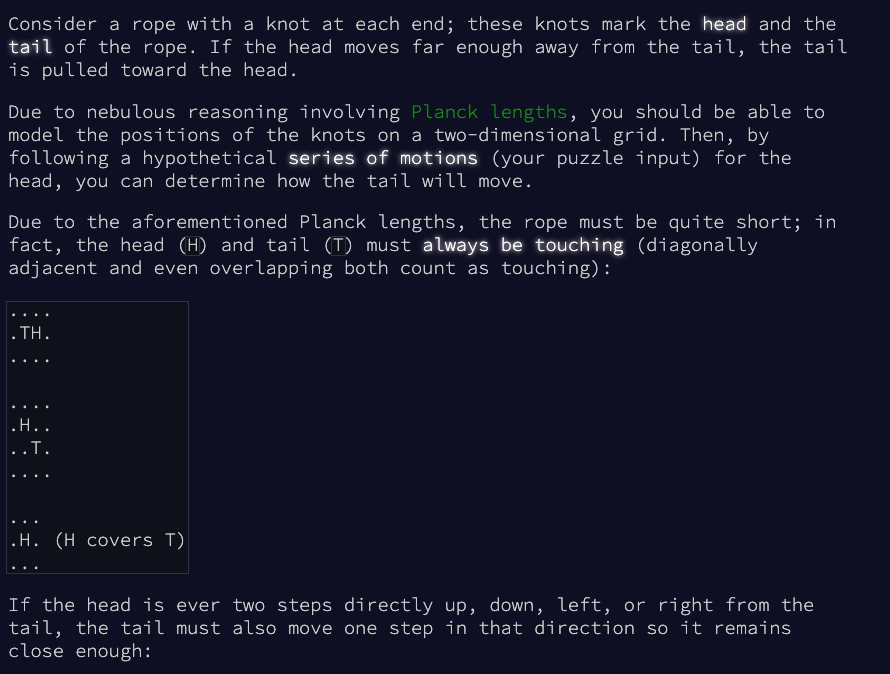

In [1]:
from IPython import display
display.Image("day9part1instructionsA.jpeg")

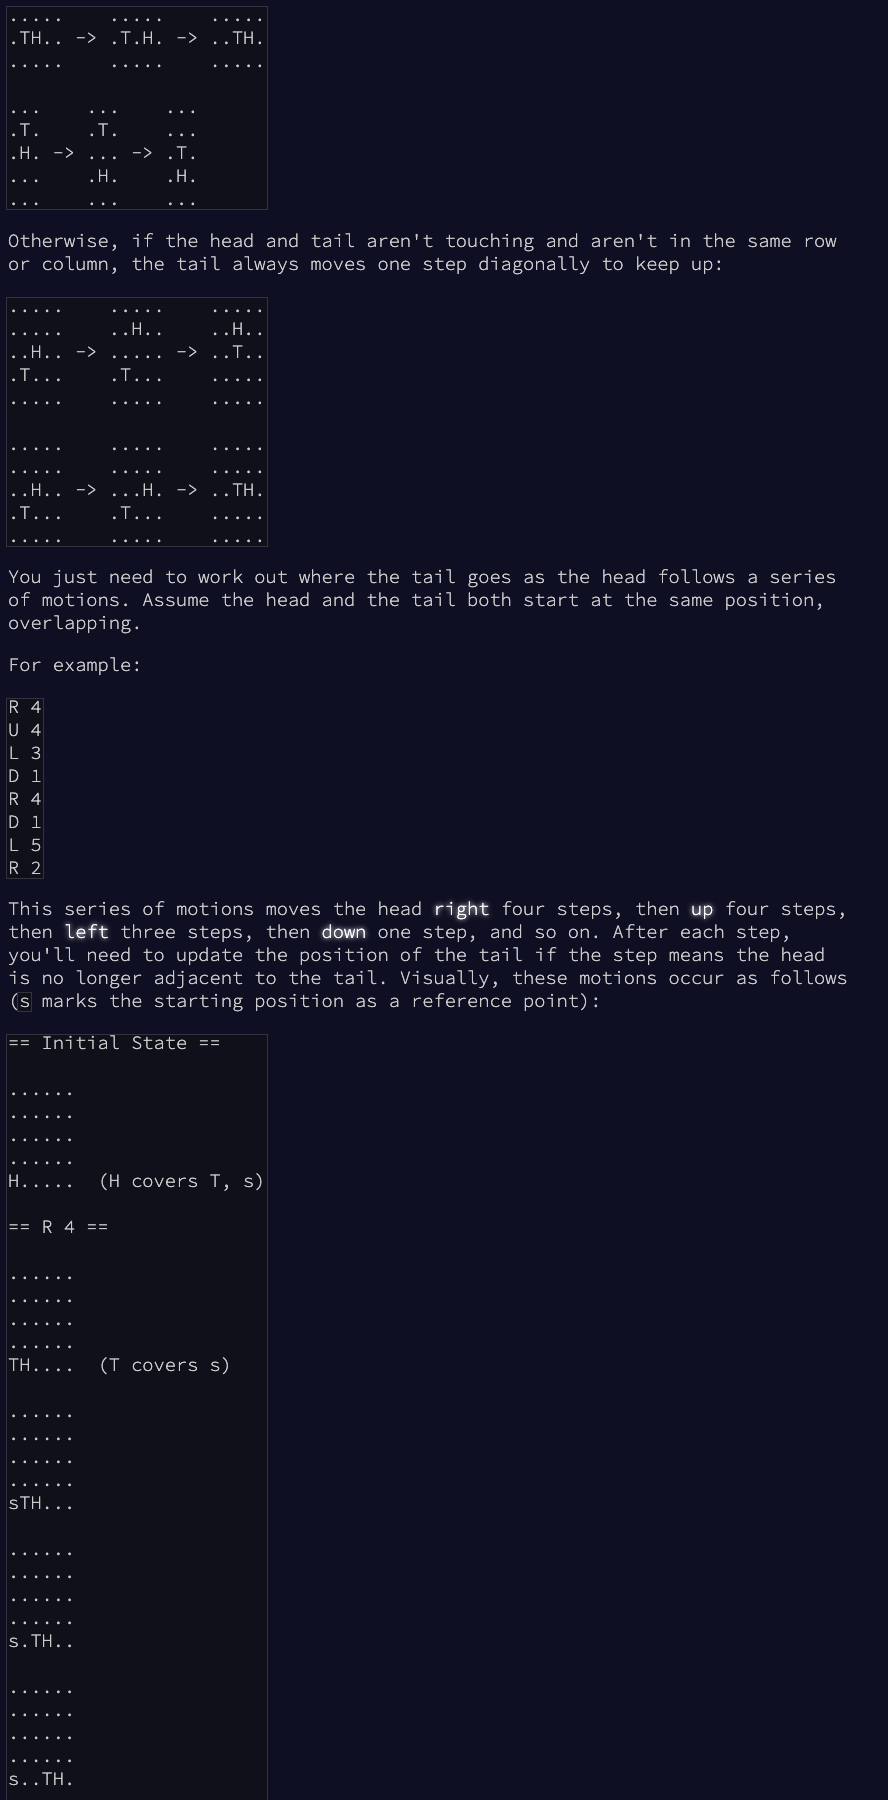

In [2]:
display.Image("day9part1instructionsB.jpeg")

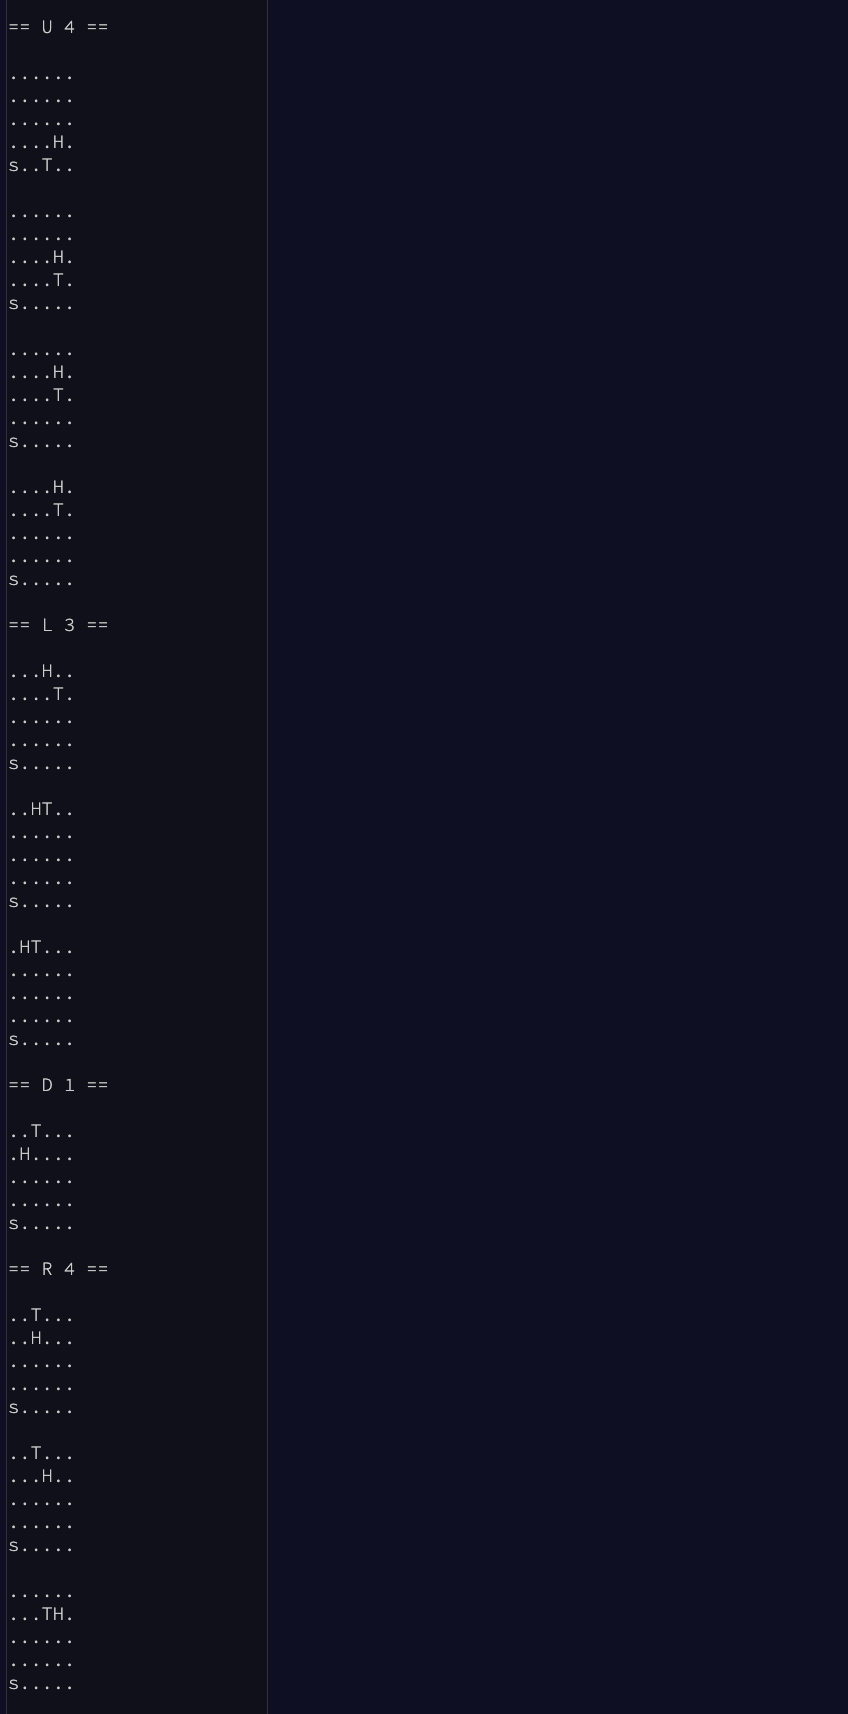

In [3]:
display.Image("day9part1instructionsC.jpeg")

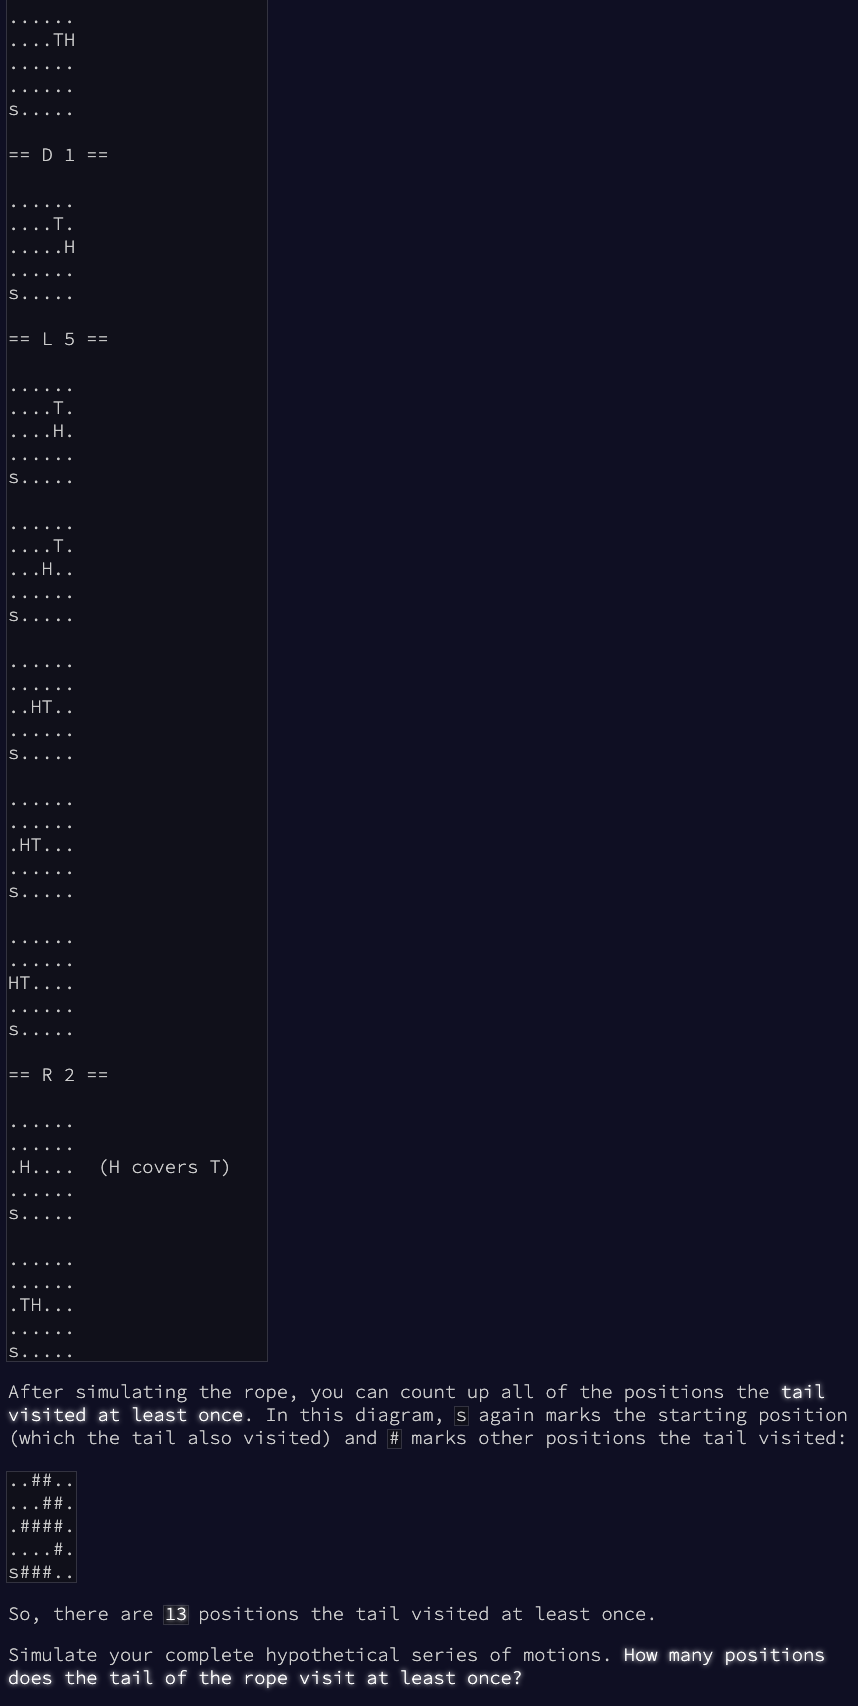

In [4]:
display.Image("day9part1instructionsD.jpeg")

<b>SOLVING ON EXAMPLE FIRST</b>

In [5]:
# how Tail moves up for all posible Head-Tail origin, Head direction combinations by hand 

# H covers T: 
#   H moves 1 left - T stays in place
#   H moves 1 right - T stays in place
#   H moves 1 up - T stays in place
#   H moves 1 down - T stays in place

# H to left of T: 
#   H moves 1 left - T moves 1 left
#   H moves 1 right - T stays in place
#   H moves 1 up - T stays in place
#   H moves 1 down - T stays in place


# H to right of T: 
#   H moves 1 left - T stays in place
#   H moves 1 right - T moves 1 right
#   H moves 1 up - T stays in place
#   H moves 1 down - T stays in place

# H above T:
#   H moves 1 left - T stays in place
#   H moves 1 right - T stays in place
#   H moves 1 up - T moves 1 up
#   H moves 1 down - T stays in place

# H below T:
#   H moves 1 left - T stays in place
#   H moves 1 right - T stays in place
#   H moves 1 up - T stays in place
#   H moves 1 down - T moves 1 up

# H up-left of T:
#   H moves 1 left - T moves 1 up, 1 left
#   H moves 1 right - T stays in place
#   H moves 1 up - T moves 1 up, 1 left
#   H moves 1 down - T stays in place

# H up-right of T:
#   H moves 1 left - T stays in place
#   H moves 1 right - T moves 1 up, 1 right
#   H moves 1 up - T moves 1 up, 1 right
#   H moves 1 down - T stays in place

# H down-left of T:
#   H moves 1 left - T moves 1 down, 1 left
#   H moves 1 right - T stays in place
#   H moves 1 up - T stays in place
#   H moves 1 down - T moves 1 down, 1 left

# H down-right of T:
#   H moves 1 left - T stays in place
#   H moves 1 right - T moves 1 down, 1 right
#   H moves 1 up - T stays in place
#   H moves 1 down - T moves 1 down, 1 right


In [6]:
# creating list of motions matching example

motion_list = ['R 4', 'U 4', 'L 3', 'D 1', 'R 4', 'D 1', 'L 5', 'R 2']

motion_list


['R 4', 'U 4', 'L 3', 'D 1', 'R 4', 'D 1', 'L 5', 'R 2']

In [7]:
# seperating directions and number of steps

directions = []
n_steps = []

for motion in motion_list:
    motion_split = motion.split( )
    directions.append(motion_split[0])
    n_steps.append(int(motion_split[1]))

print(directions)
print(n_steps)

['R', 'U', 'L', 'D', 'R', 'D', 'L', 'R']
[4, 4, 3, 1, 4, 1, 5, 2]


In [8]:
# converting the seperate lists back to one, each direction repeated per number of steps 

moves = []

for direction, n_step in zip(directions, n_steps):
    for n in range(n_step):
        moves.append(direction)

print(moves)

['R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'L', 'L', 'L', 'D', 'R', 'R', 'R', 'R', 'D', 'L', 'L', 'L', 'L', 'L', 'R', 'R']


In [9]:
# beginning with H and T both at coordinate 0,0
# for each move in moves list:
# tracking where H and T's position in relation to each other before the move
# tracking where H moves,
# tracking T moves based on H's move + H and T's relative starting position
# at each iteration, repeats with new H and T coordinates, relative position, and H move direction

head_curr = [0,0]
tail_curr = [0,0]

head_visits = [[0,0]]
tail_visits = [[0,0]]

for move in moves:
    
    head_start = head_visits[-1]
    tail_start = tail_visits[-1]

    if move == 'L':
        head_curr[0] -= 1
        head_visits.append(head_curr.copy())
    elif move == 'R':
        head_curr[0] += 1
        head_visits.append(head_curr.copy())
    elif move == 'U':
        head_curr[1] += 1
        head_visits.append(head_curr.copy())
    elif move == 'D':
        head_curr[1] -= 1
        head_visits.append(head_curr.copy())
    
        
    position = None
    
    if head_start == tail_start:
        position = 'H_cover_T'
    elif head_start[0] < tail_start[0] and head_start[1] == tail_start[1]:
        position = 'H_left_of_T'
    elif head_start[0] > tail_start[0] and head_start[1] == tail_start[1]:
        position = 'H_right_of_T'
    elif head_start[0] == tail_start[0] and head_start[1] > tail_start[1]:
        position = 'H_above_T'
    elif head_start[0] == tail_start[0] and head_start[1] < tail_start[1]:
        position = 'H_below_T'
    elif head_start[0] < tail_start[0] and head_start[1] > tail_start[1]:
        position = 'H_up_left_of_T'
    elif head_start[0] > tail_start[0] and head_start[1] > tail_start[1]:
        position = 'H_up_right_of_T'
    elif head_start[0] < tail_start[0] and head_start[1] < tail_start[1]:
        position = 'H_down_left_of_T'
    elif head_start[0] > tail_start[0] and head_start[1] < tail_start[1]:
        position = 'H_down_right_of_T'
    
    
    if position == 'H_cover_T':
        tail_visits.append(tail_curr.copy())
    
    if position == 'H_left_of_T':
        if move == 'L':
            tail_curr[0] -= 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_right_of_T':
        if move == 'R':
            tail_curr[0] += 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_above_T':
        if move == 'U':
            tail_curr[1] += 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_below_T':
        if move == 'D':
            tail_curr[1] -= 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_up_left_of_T':
        if move == 'L' or move == 'U':
            tail_curr[0] -= 1
            tail_curr[1] += 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_up_right_of_T':
        if move == 'R' or move == 'U':
            tail_curr[0] += 1
            tail_curr[1] += 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_down_left_of_T':
        if move == 'L' or move == 'D':
            tail_curr[0] -= 1
            tail_curr[1] -= 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
            
    if position == 'H_down_right_of_T':
        if move == 'R' or move == 'D':
            tail_curr[0] += 1
            tail_curr[1] -= 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    

In [10]:
# now we have a list of where T landed at each move 

print(tail_visits)

[[0, 0], [0, 0], [1, 0], [2, 0], [3, 0], [3, 0], [4, 1], [4, 2], [4, 3], [4, 3], [3, 4], [2, 4], [2, 4], [2, 4], [2, 4], [3, 3], [4, 3], [4, 3], [4, 3], [4, 3], [3, 2], [2, 2], [1, 2], [1, 2], [1, 2]]


In [11]:
# count how many unique coordinates are in the the list: 
# this is the number of unique postions T visited at least once 

unique_tail_visits = []

for visit in tail_visits:
    if visit not in unique_tail_visits:
        unique_tail_visits.append(visit)

len(unique_tail_visits)    

13

<b>SOLVING ON ACTUAL PUZZLE INPUT</b>

In [12]:
# same strategy as above, just with a much longer list of motions

with open('day9input.txt') as day9input:
    raw_input = day9input.read()
    
raw_input[:500]

'L 2\nD 2\nR 2\nU 1\nL 1\nU 1\nR 1\nU 2\nR 2\nU 2\nL 2\nR 2\nU 2\nL 2\nU 1\nR 1\nU 1\nR 2\nU 1\nD 2\nU 2\nL 2\nR 1\nU 2\nR 2\nU 2\nL 1\nD 1\nL 1\nR 2\nL 2\nD 1\nL 1\nR 2\nU 2\nL 1\nU 1\nL 2\nR 1\nL 1\nD 2\nU 2\nL 2\nD 1\nR 2\nD 1\nU 2\nD 2\nL 2\nD 1\nL 1\nR 1\nD 2\nU 2\nL 2\nU 1\nL 1\nU 2\nR 2\nD 1\nU 2\nR 2\nU 1\nL 2\nR 2\nD 2\nU 2\nD 2\nL 2\nD 1\nU 2\nL 1\nR 1\nL 1\nD 2\nU 1\nD 1\nL 2\nD 1\nL 1\nR 1\nU 1\nL 2\nR 2\nU 2\nD 2\nL 1\nR 2\nD 1\nR 2\nD 2\nL 1\nU 2\nR 1\nD 2\nL 1\nD 2\nU 2\nD 1\nU 2\nR 1\nD 1\nL 1\nD 2\nR 2\nU 1\nR 1\nD 2\nL 2\nR 2\nD 1\nR 3\nU 1\nD 1\nU 1\nR 2\nU 2\nR 3\nU 3\nL 3\nD 2\nL 3\nD 1\nL 3\nD 3\n'

In [13]:
motion_list = raw_input.splitlines()

print(motion_list[:15])

['L 2', 'D 2', 'R 2', 'U 1', 'L 1', 'U 1', 'R 1', 'U 2', 'R 2', 'U 2', 'L 2', 'R 2', 'U 2', 'L 2', 'U 1']


In [14]:
directions = []
n_steps = []

for motion in motion_list:
    motion_split = motion.split( )
    directions.append(motion_split[0])
    n_steps.append(int(motion_split[1]))

print(directions[:20])
print(n_steps[:20])

['L', 'D', 'R', 'U', 'L', 'U', 'R', 'U', 'R', 'U', 'L', 'R', 'U', 'L', 'U', 'R', 'U', 'R', 'U', 'D']
[2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2]


In [15]:
moves = []

for direction, n_step in zip(directions, n_steps):
    for n in range(n_step):
        moves.append(direction)

print(moves[:20])

['L', 'L', 'D', 'D', 'R', 'R', 'U', 'L', 'U', 'R', 'U', 'U', 'R', 'R', 'U', 'U', 'L', 'L', 'R', 'R']


In [16]:
# beginning with H and T both at coordinate 0,0
# for each move in moves list:
# tracking where H and T's position in relation to each other before the move
# tracking where H moves,
# tracking T moves based on H's move + H and T's relative starting position
# at each iteration, repeats with new H and T coordinates, relative position, and H move direction

head_curr = [0,0]
tail_curr = [0,0]

head_visits = [[0,0]]
tail_visits = [[0,0]]

for move in moves:
    
    head_start = head_visits[-1]
    tail_start = tail_visits[-1]

    if move == 'L':
        head_curr[0] -= 1
        head_visits.append(head_curr.copy())
    elif move == 'R':
        head_curr[0] += 1
        head_visits.append(head_curr.copy())
    elif move == 'U':
        head_curr[1] += 1
        head_visits.append(head_curr.copy())
    elif move == 'D':
        head_curr[1] -= 1
        head_visits.append(head_curr.copy())
    
        
    position = None
    
    if head_start == tail_start:
        position = 'H_cover_T'
    elif head_start[0] < tail_start[0] and head_start[1] == tail_start[1]:
        position = 'H_left_of_T'
    elif head_start[0] > tail_start[0] and head_start[1] == tail_start[1]:
        position = 'H_right_of_T'
    elif head_start[0] == tail_start[0] and head_start[1] > tail_start[1]:
        position = 'H_above_T'
    elif head_start[0] == tail_start[0] and head_start[1] < tail_start[1]:
        position = 'H_below_T'
    elif head_start[0] < tail_start[0] and head_start[1] > tail_start[1]:
        position = 'H_up_left_of_T'
    elif head_start[0] > tail_start[0] and head_start[1] > tail_start[1]:
        position = 'H_up_right_of_T'
    elif head_start[0] < tail_start[0] and head_start[1] < tail_start[1]:
        position = 'H_down_left_of_T'
    elif head_start[0] > tail_start[0] and head_start[1] < tail_start[1]:
        position = 'H_down_right_of_T'
    
    
    if position == 'H_cover_T':
        tail_visits.append(tail_curr.copy())
    
    if position == 'H_left_of_T':
        if move == 'L':
            tail_curr[0] -= 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_right_of_T':
        if move == 'R':
            tail_curr[0] += 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_above_T':
        if move == 'U':
            tail_curr[1] += 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_below_T':
        if move == 'D':
            tail_curr[1] -= 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_up_left_of_T':
        if move == 'L' or move == 'U':
            tail_curr[0] -= 1
            tail_curr[1] += 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_up_right_of_T':
        if move == 'R' or move == 'U':
            tail_curr[0] += 1
            tail_curr[1] += 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    
    if position == 'H_down_left_of_T':
        if move == 'L' or move == 'D':
            tail_curr[0] -= 1
            tail_curr[1] -= 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
            
    if position == 'H_down_right_of_T':
        if move == 'R' or move == 'D':
            tail_curr[0] += 1
            tail_curr[1] -= 1
            tail_visits.append(tail_curr.copy())
        else:
            tail_visits.append(tail_curr.copy())
    

In [17]:
print(tail_visits[:25])

[[0, 0], [0, 0], [-1, 0], [-1, 0], [-2, -1], [-2, -1], [-1, -2], [-1, -2], [-1, -2], [-1, -1], [-1, -1], [0, 0], [0, 1], [0, 1], [1, 2], [1, 2], [2, 3], [2, 3], [1, 4], [1, 4], [1, 4], [1, 4], [2, 5], [2, 5], [1, 6]]


In [18]:
unique_tail_visits = []

for visit in tail_visits:
    if visit not in unique_tail_visits:
        unique_tail_visits.append(visit)

len(unique_tail_visits)  

5513